# 📊 Task 2: Exploratory Data Analysis (EDA)
📝 Synopsis:

This notebook fulfills Task 2 of the Data Science internship. It includes general EDA using the Global Superstore dataset and Sales Performance Analysis using the sales_data_sample.csv dataset, including data cleaning, visualizations, and predictive modeling.

This notebook contains two projects:
1. General EDA on a retail dataset
2. Sales Performance Analysis with predictive modeling

## 🧪 Project 1: General EDA

### Step 1: Dataset Selection
Use a dataset like **Global Superstore** with columns such as:
- Sales
- Profit
- Region
- Product Categories

### Step 2: Data Cleaning

In [9]:
import pandas as pd

# Use raw string or double backslashes
df = pd.read_excel(r"C:\Users\Balu\Desktop\global_superstore.csv.xlsx")

# Check for missing values
print(df.isnull().sum())

# Fill missing Sales values with median
df['Sales'].fillna(df['Sales'].median(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle outliers in Sales using IQR
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Sales'] < (Q1 - 1.5 * IQR)) | (df['Sales'] > (Q3 + 1.5 * IQR)))]

# Display top rows
df.head()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
685,50937,TZ-2013-3060,24-09-2013,24-09-2013,Same Day,HH-5010,Hilary Holden,Corporate,Dar es Salaam,Dar Es Salaam,...,OFF-HAM-10003368,Office Supplies,Appliances,"Hamilton Beach Blender, Black",553.440,8,0.00,16.5600,246.05,Critical
815,30241,ID-2011-74175,23-11-2011,25-11-2011,First Class,BM-11140,Becky Martin,Consumer,Jakarta,Jakarta,...,TEC-MA-10004553,Technology,Machines,"Epson Receipt Printer, Red",473.847,5,0.17,-5.8530,226.73,Critical
844,5917,MX-2011-126375,28-11-2011,30-11-2011,First Class,SC-20845,Sung Chung,Consumer,Monclova,Coahuila,...,TEC-MA-10003400,Technology,Machines,"Panasonic Printer, Durable",533.220,3,0.00,69.3000,222.05,Critical
865,42555,EZ-2014-1650,02-09-2014,04-09-2014,First Class,AG-270,Alejandro Grove,Consumer,Prague,Prague,...,FUR-HON-10001851,Furniture,Chairs,"Hon Executive Leather Armchair, Black",457.140,1,0.00,169.1400,218.96,Critical
942,34756,CA-2014-136448,17-09-2014,19-09-2014,First Class,AS-10090,Adam Shillingsburg,Consumer,Philadelphia,Pennsylvania,...,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,538.194,2,0.70,-412.6154,209.30,Critical


### Step 3: Statistical Analysis

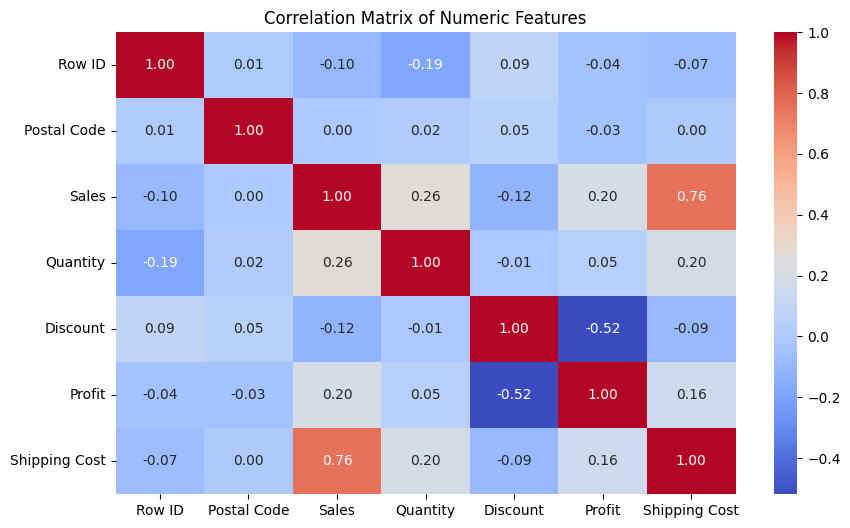

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation only on numeric columns
corr_matrix = df.corr(numeric_only=True)

# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### Step 4: Data Visualization

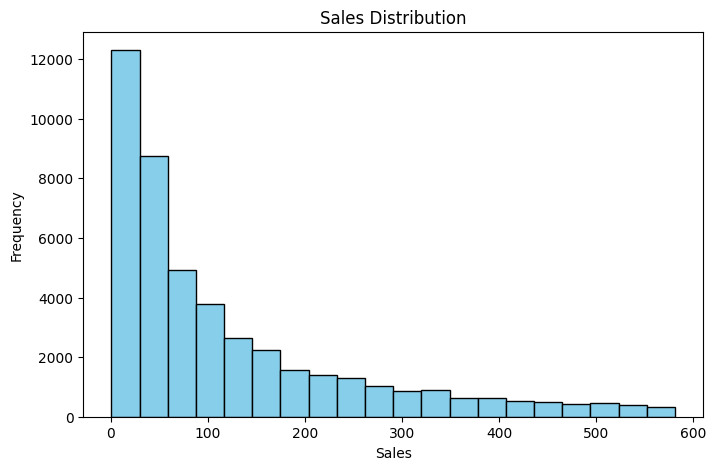

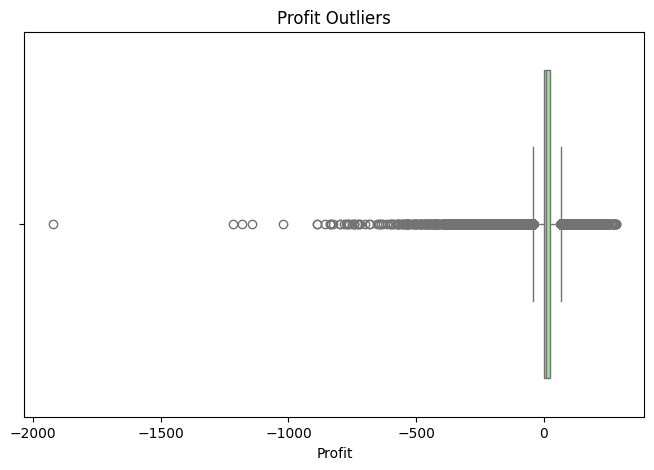

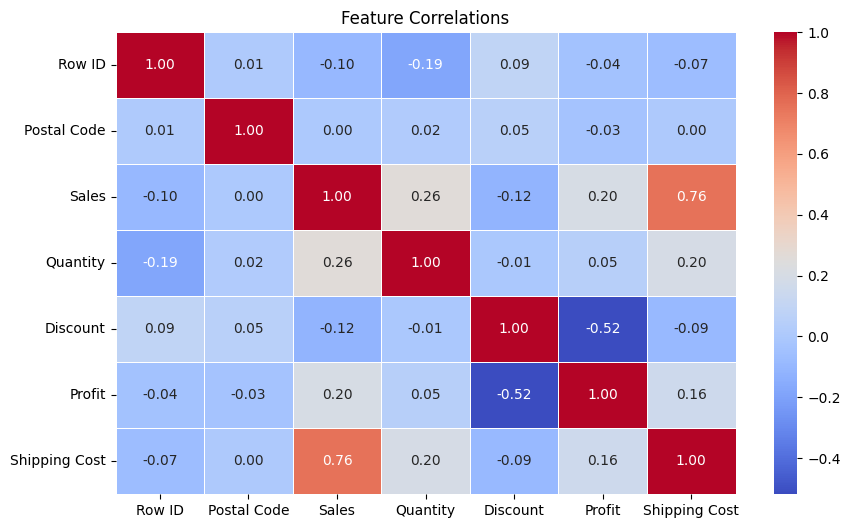

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Sales
plt.figure(figsize=(8, 5))
df['Sales'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

# Boxplot for Profit
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Profit'], color='lightgreen')
plt.title("Profit Outliers")
plt.xlabel("Profit")
plt.show()

# Heatmap of numeric feature correlations
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()


## 💼 Project 2: Sales Performance Analysis

### Step 1: Load and Explore Dataset

Columns in dataset:
Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')
Auto-detected date column: ORDERDATE
✅ Converted 'ORDERDATE' to datetime format.

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       


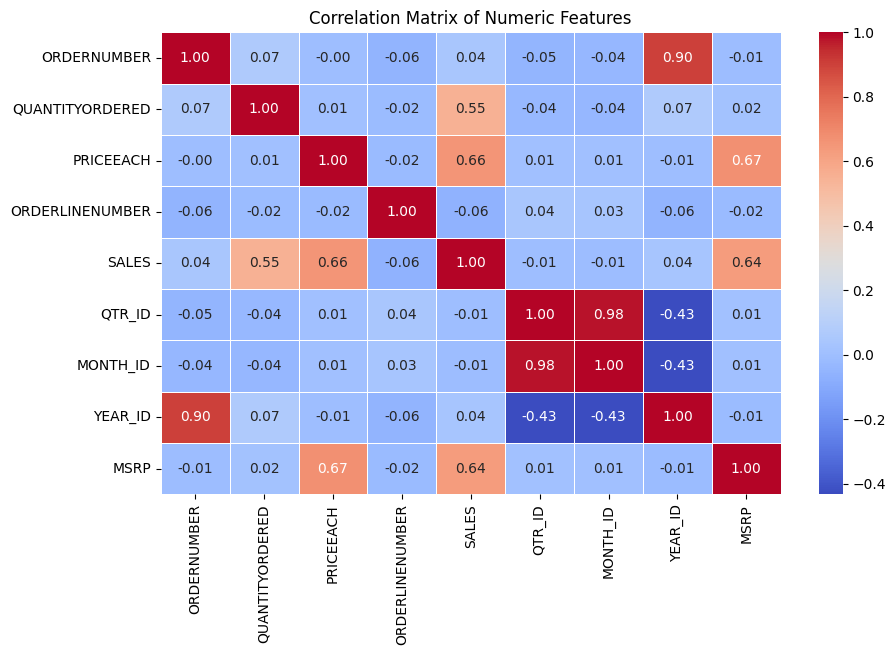

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV file (with encoding fix)
file_path = r"C:\Users\Balu\Desktop\sales_data_sample.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Step 2: Preview the column names to identify the correct date column
print("Columns in dataset:")
print(df.columns)

# Step 3: Convert the correct date column (auto-detect if unsure)
date_column = None
for col in df.columns:
    if 'date' in col.lower():
        print(f"Auto-detected date column: {col}")
        df[col] = pd.to_datetime(df[col], errors='coerce')
        date_column = col
        break

if date_column is None:
    print("❌ No date-like column found. Skipping date conversion.")
else:
    print(f"✅ Converted '{date_column}' to datetime format.")

# Step 4: Display dataset info and sample rows
print("\n📊 Dataset Info:")
print(df.info())
print("\n🔍 Sample Rows:")
print(df.head())

# Step 5: Handle missing values
df.fillna(method='ffill', inplace=True)

# Step 6: Remove duplicates
df.drop_duplicates(inplace=True)

# Step 7: Visualizations

## Histogram for Sales
if 'Sales' in df.columns:
    plt.figure(figsize=(8, 5))
    df['Sales'].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title("Sales Distribution")
    plt.xlabel("Sales")
    plt.ylabel("Frequency")
    plt.grid(False)
    plt.show()

## Boxplot for Profit (if available)
if 'Profit' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['Profit'], color='lightgreen')
    plt.title("Profit Outliers")
    plt.xlabel("Profit")
    plt.show()

## Heatmap of numeric correlations
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


### Step 2: Exploratory Data Analysis

📊 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE  

C:\Users\Balu\AppData\Local\Temp\ipykernel_8648\2047006800.py:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\users\balu\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


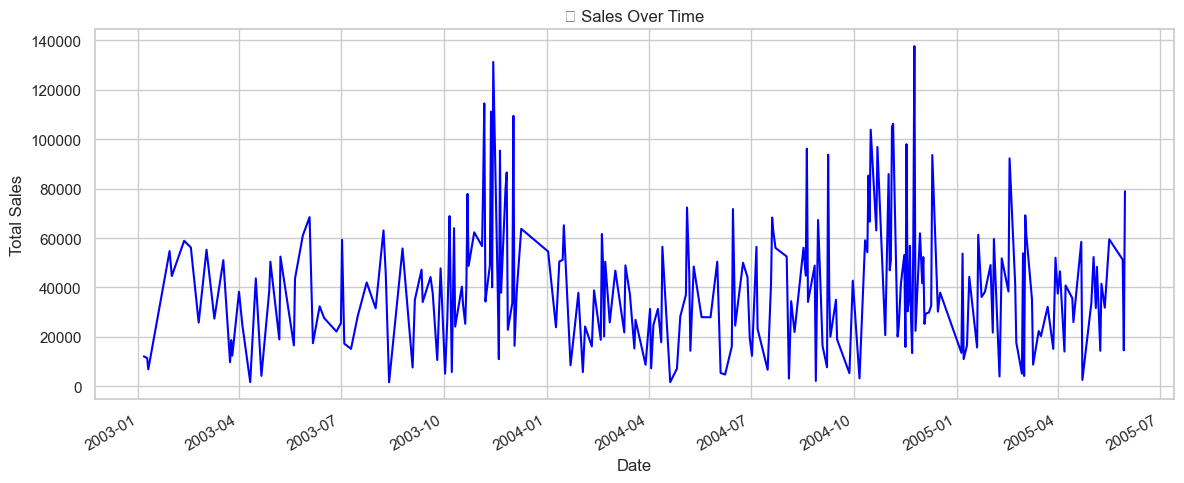

C:\Users\Balu\AppData\Local\Temp\ipykernel_8648\2047006800.py:44: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\users\balu\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


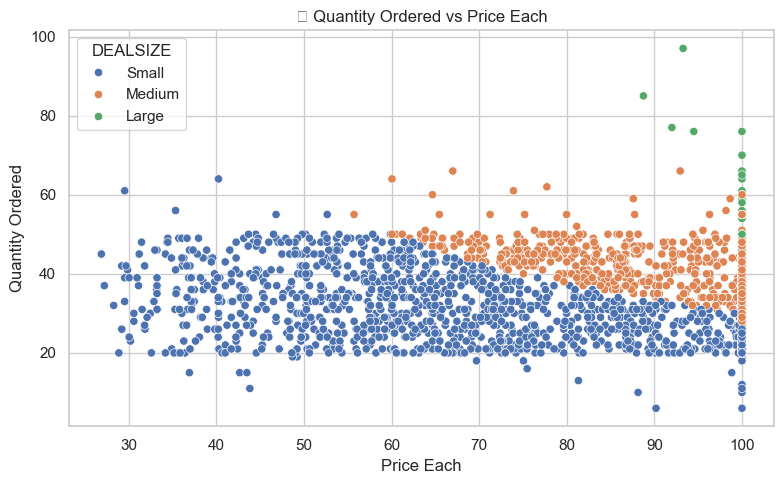

C:\Users\Balu\AppData\Local\Temp\ipykernel_8648\2047006800.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x="PRODUCTLINE", y="SALES", palette="Set2")
C:\Users\Balu\AppData\Local\Temp\ipykernel_8648\2047006800.py:55: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
c:\users\balu\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


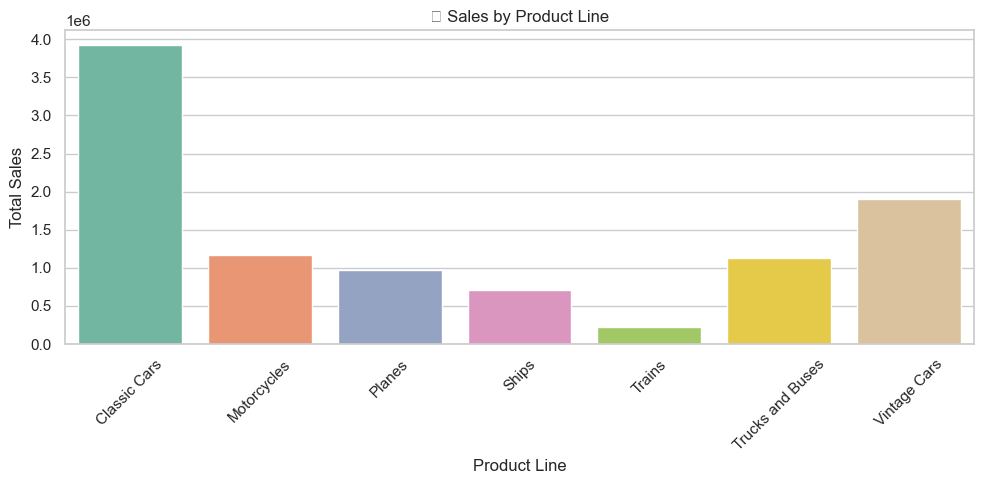

C:\Users\Balu\AppData\Local\Temp\ipykernel_8648\2047006800.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_sales, x="COUNTRY", y="SALES", palette="Blues_d")
C:\Users\Balu\AppData\Local\Temp\ipykernel_8648\2047006800.py:66: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
c:\users\balu\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


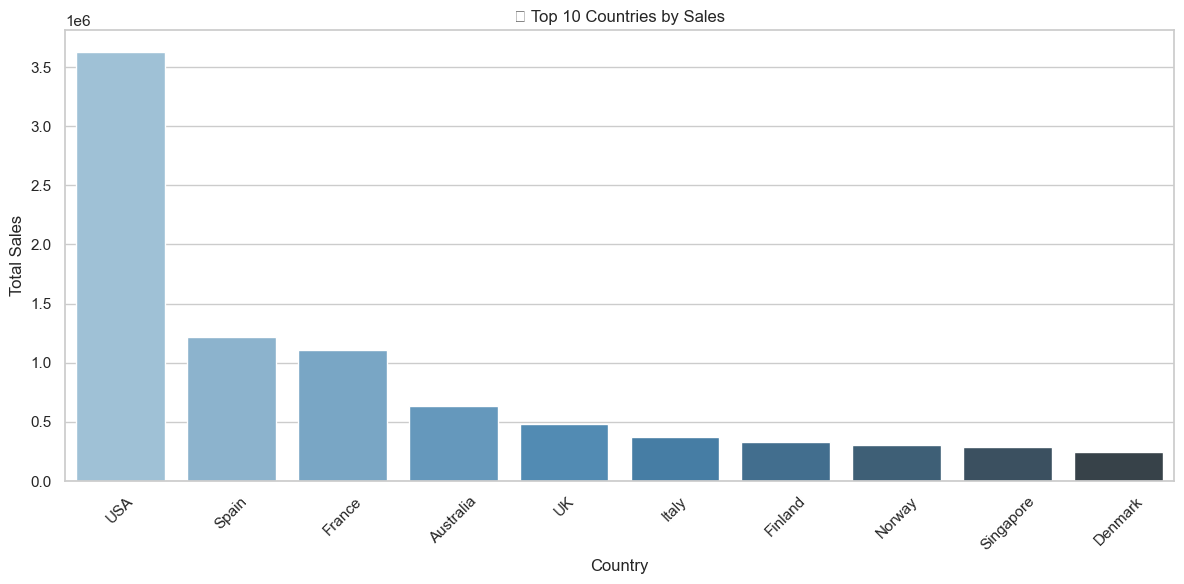

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Balu\Desktop\sales_data_sample.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Basic info
print("📊 Data Overview:")
print(df.info())
print("\n🔍 Sample Rows:")
print(df.head())

# Fill missing values (if any)
df.fillna(method='ffill', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# ---- VISUALIZATIONS ---- #

sns.set(style="whitegrid")

# 1. Time Series Plot of Sales Over Time
plt.figure(figsize=(12, 5))
df.groupby(df['ORDERDATE'])['SALES'].sum().plot(color='blue')
plt.title("📈 Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Scatter Plot: PRICEEACH vs QUANTITYORDERED
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="PRICEEACH", y="QUANTITYORDERED", hue="DEALSIZE")
plt.title("📉 Quantity Ordered vs Price Each")
plt.xlabel("Price Each")
plt.ylabel("Quantity Ordered")
plt.tight_layout()
plt.show()

# 3. Sales by Product Line
plt.figure(figsize=(10, 5))
product_sales = df.groupby("PRODUCTLINE")["SALES"].sum().reset_index()
sns.barplot(data=product_sales, x="PRODUCTLINE", y="SALES", palette="Set2")
plt.title("📦 Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Sales by Country
plt.figure(figsize=(12, 6))
country_sales = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=country_sales, x="COUNTRY", y="SALES", palette="Blues_d")
plt.title("🌍 Top 10 Countries by Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 3: Predictive Modeling (Linear Regression)

📊 Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE  

C:\Users\Balu\AppData\Local\Temp\ipykernel_8648\1829853014.py:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\users\balu\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


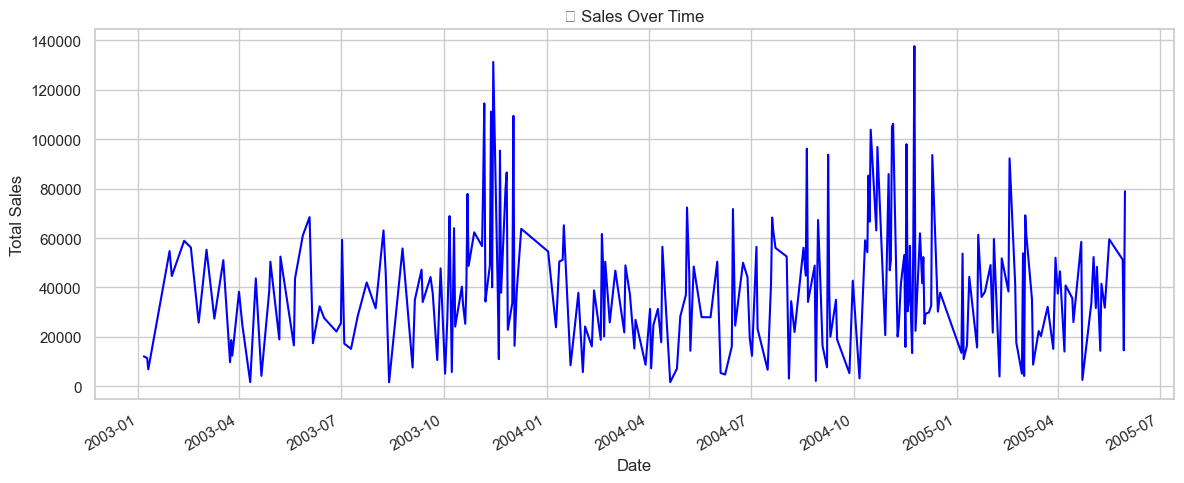

C:\Users\Balu\AppData\Local\Temp\ipykernel_8648\1829853014.py:44: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\users\balu\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


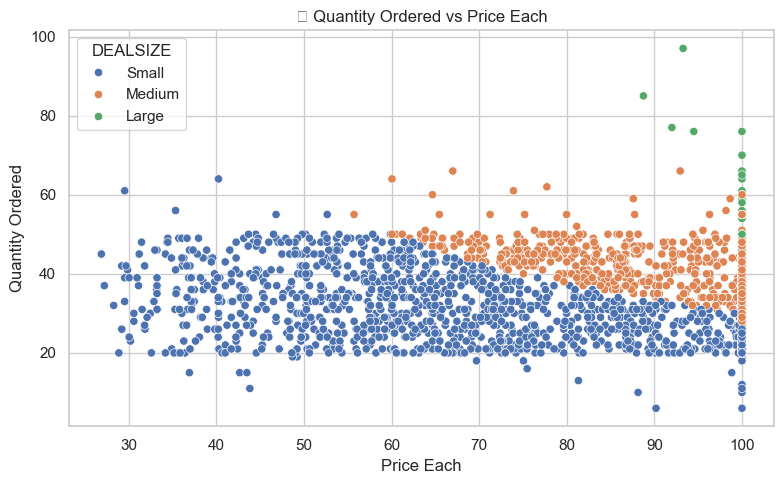

C:\Users\Balu\AppData\Local\Temp\ipykernel_8648\1829853014.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x="PRODUCTLINE", y="SALES", palette="Set2")
C:\Users\Balu\AppData\Local\Temp\ipykernel_8648\1829853014.py:55: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  plt.tight_layout()
c:\users\balu\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


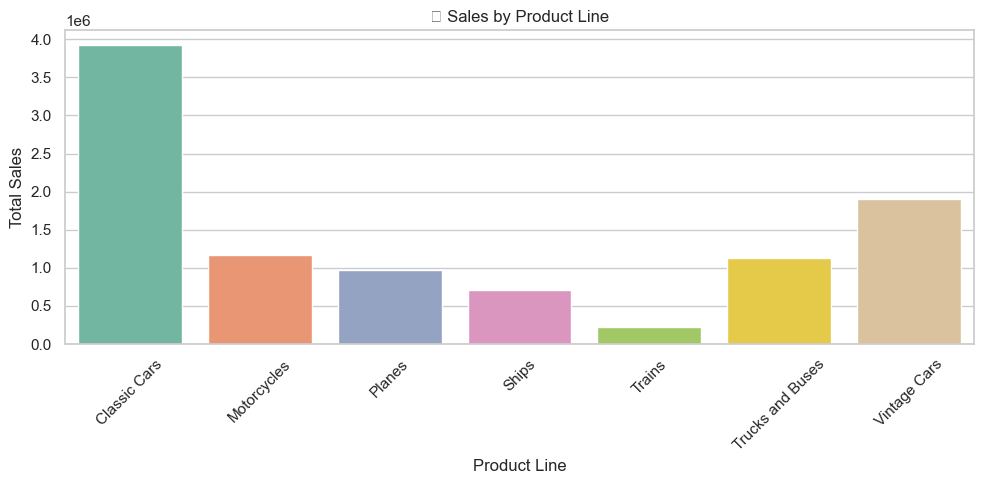

C:\Users\Balu\AppData\Local\Temp\ipykernel_8648\1829853014.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_sales, x="COUNTRY", y="SALES", palette="Blues_d")
C:\Users\Balu\AppData\Local\Temp\ipykernel_8648\1829853014.py:66: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
c:\users\balu\appdata\local\programs\python\python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


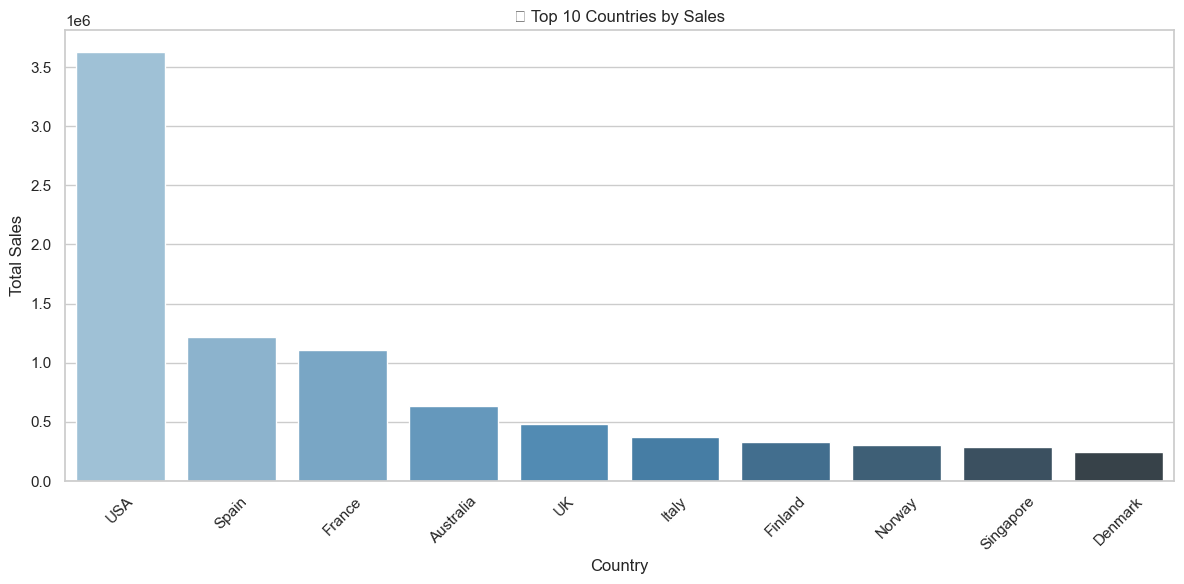

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\Balu\Desktop\sales_data_sample.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Basic info
print("📊 Data Overview:")
print(df.info())
print("\n🔍 Sample Rows:")
print(df.head())

# Fill missing values (if any)
df.fillna(method='ffill', inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# ---- VISUALIZATIONS ---- #

sns.set(style="whitegrid")

# 1. Time Series Plot of Sales Over Time
plt.figure(figsize=(12, 5))
df.groupby(df['ORDERDATE'])['SALES'].sum().plot(color='blue')
plt.title("📈 Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Scatter Plot: PRICEEACH vs QUANTITYORDERED
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="PRICEEACH", y="QUANTITYORDERED", hue="DEALSIZE")
plt.title("📉 Quantity Ordered vs Price Each")
plt.xlabel("Price Each")
plt.ylabel("Quantity Ordered")
plt.tight_layout()
plt.show()

# 3. Sales by Product Line
plt.figure(figsize=(10, 5))
product_sales = df.groupby("PRODUCTLINE")["SALES"].sum().reset_index()
sns.barplot(data=product_sales, x="PRODUCTLINE", y="SALES", palette="Set2")
plt.title("📦 Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Sales by Country
plt.figure(figsize=(12, 6))
country_sales = df.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=country_sales, x="COUNTRY", y="SALES", palette="Blues_d")
plt.title("🌍 Top 10 Countries by Sales")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



📊 Descriptive Statistics:
               Sales        Profit
count  45635.000000  45635.000000
mean     121.659859     10.191308
std      131.533247     64.842801
min        0.444000  -1924.542000
25%       27.180000     -0.013200
50%       67.080000      7.703100
75%      168.600000     26.661600
max      581.400000    284.220000

📏 Variance:
 Sales     17300.994974
Profit     4204.588781
dtype: float64


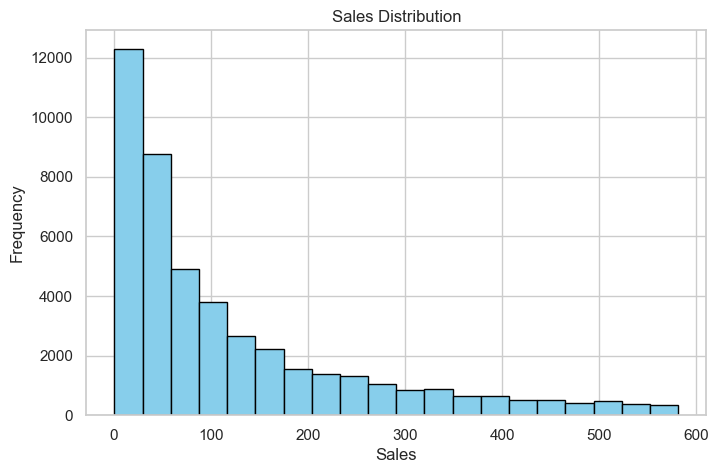

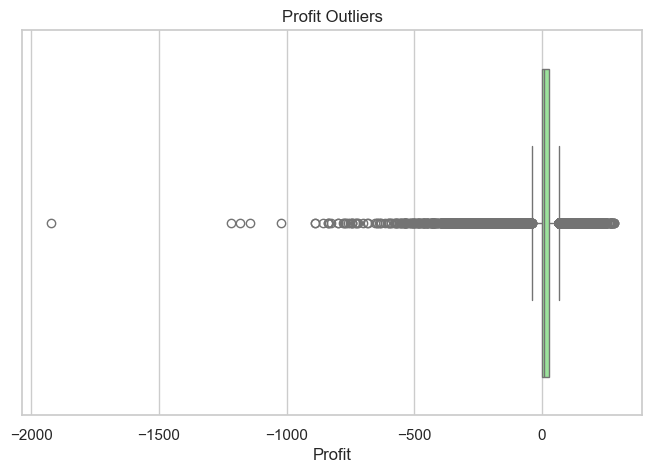

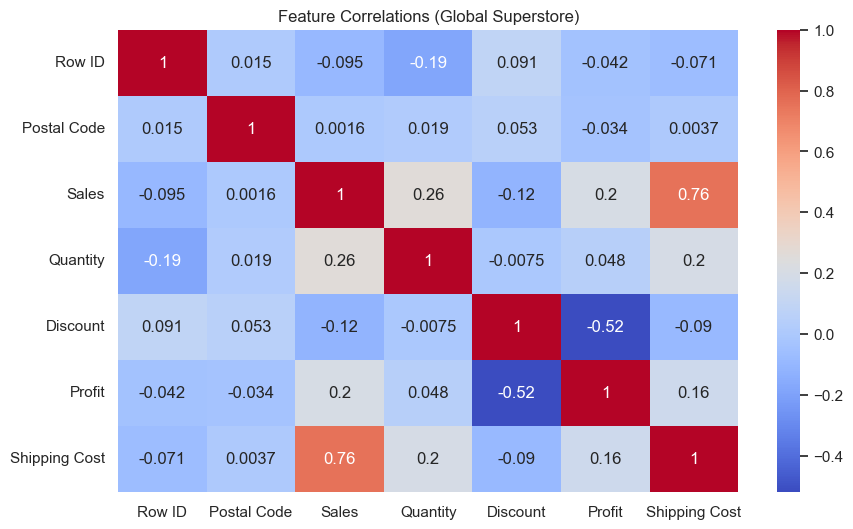

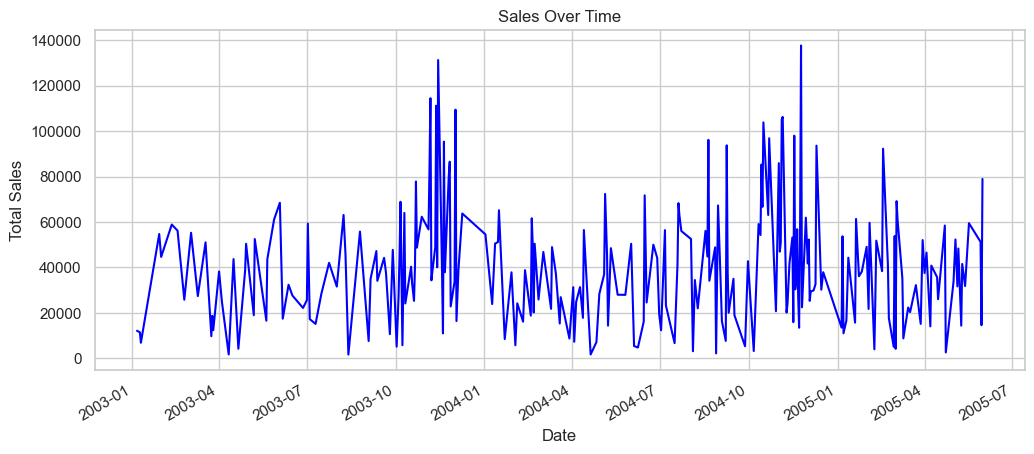

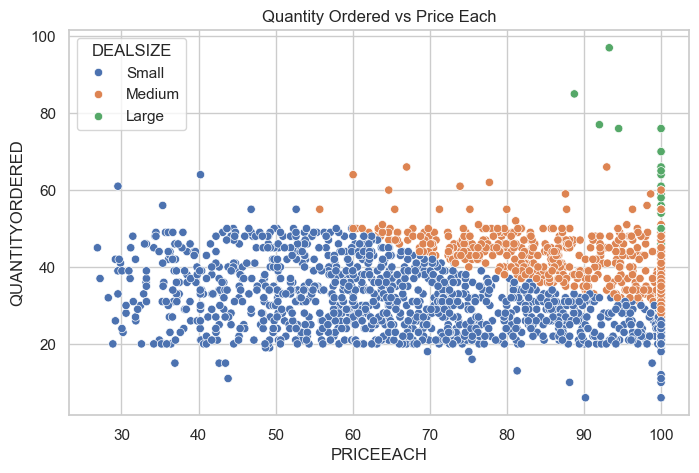

C:\Users\Balu\AppData\Local\Temp\ipykernel_8812\325203999.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_sales, x="PRODUCTLINE", y="SALES", palette="Set2")


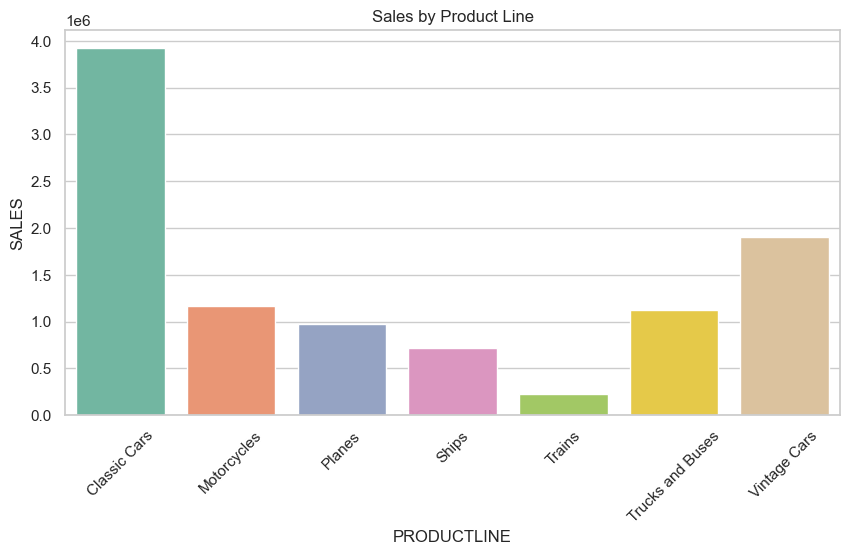

C:\Users\Balu\AppData\Local\Temp\ipykernel_8812\325203999.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x="COUNTRY", y="SALES", palette="Blues_d")


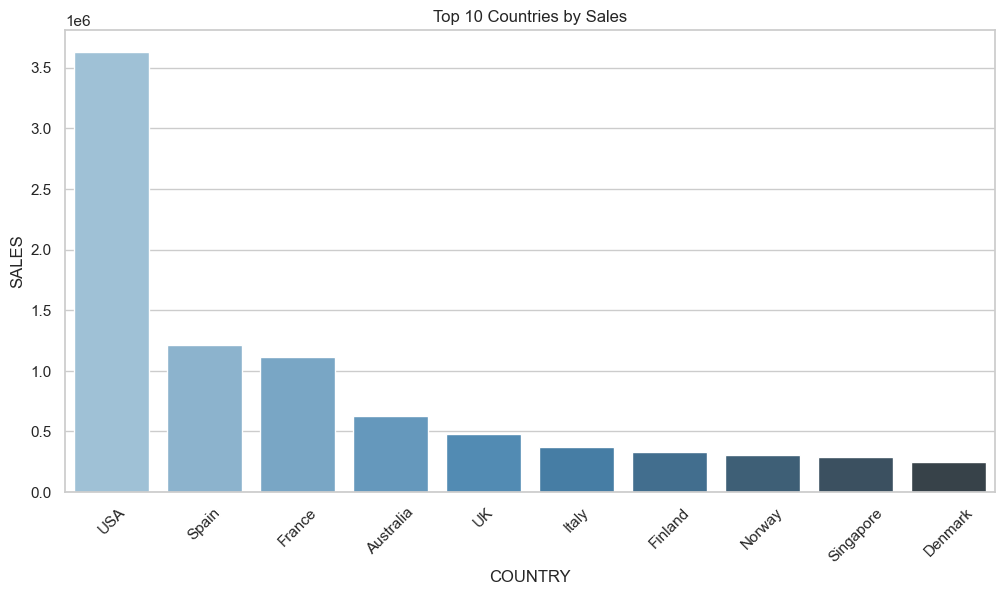

🔍 R² Score: 0.6885468480396754
📉 Mean Squared Error (MSE): 1359458.7982060874

📌 Insights:
- Sales vary over time with seasonal peaks.
- High deal sizes tend to have higher quantity orders.
- Product lines like Classic Cars and Vintage Cars are top performers.
- Countries like USA and Germany show strong performance.

💡 Recommendations:
- Focus campaigns on high-performing product lines.
- Review discount policies affecting profit margins.
- Expand into top revenue-generating countries.



In [1]:
# 📦 Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

sns.set(style="whitegrid")

# ----------------------------------------
# 🧪 Project 1: General EDA - Global Superstore
# ----------------------------------------

# Step 1: Load dataset
df1 = pd.read_excel(r"C:\Users\Balu\Desktop\global_superstore.csv.xlsx")

# Step 2: Data Cleaning
df1['Sales'].fillna(df1['Sales'].median(), inplace=True)
df1.drop_duplicates(inplace=True)
Q1 = df1['Sales'].quantile(0.25)
Q3 = df1['Sales'].quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1['Sales'] < (Q1 - 1.5 * IQR)) | (df1['Sales'] > (Q3 + 1.5 * IQR)))]

# Step 3: Statistical Summary
print("📊 Descriptive Statistics:\n", df1[['Sales', 'Profit']].describe())
print("\n📏 Variance:\n", df1[['Sales', 'Profit']].var())

# Step 4: Visualizations

## Histogram
plt.figure(figsize=(8, 5))
df1['Sales'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

## Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df1['Profit'], color='lightgreen')
plt.title("Profit Outliers")
plt.show()

## Heatmap
plt.figure(figsize=(10, 6))
corr1 = df1.corr(numeric_only=True)
sns.heatmap(corr1, annot=True, cmap='coolwarm')
plt.title("Feature Correlations (Global Superstore)")
plt.show()

# Optional: Save cleaned dataset
df1.to_csv("cleaned_global_superstore.csv", index=False)

# ----------------------------------------
# 💼 Project 2: Sales Performance Analysis - sales_data_sample.csv
# ----------------------------------------

# Step 1: Load dataset
df2 = pd.read_csv(r"C:\Users\Balu\Desktop\sales_data_sample.csv", encoding="ISO-8859-1")

# Step 2: Cleaning
df2['ORDERDATE'] = pd.to_datetime(df2['ORDERDATE'], errors='coerce')
df2.fillna(method='ffill', inplace=True)
df2.drop_duplicates(inplace=True)

# Step 3: EDA

## Time Series Plot
plt.figure(figsize=(12, 5))
df2.groupby(df2['ORDERDATE'])['SALES'].sum().plot(color='blue')
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

## Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df2, x="PRICEEACH", y="QUANTITYORDERED", hue="DEALSIZE")
plt.title("Quantity Ordered vs Price Each")
plt.show()

## Bar Chart - Product Line
plt.figure(figsize=(10, 5))
product_sales = df2.groupby("PRODUCTLINE")["SALES"].sum().reset_index()
sns.barplot(data=product_sales, x="PRODUCTLINE", y="SALES", palette="Set2")
plt.title("Sales by Product Line")
plt.xticks(rotation=45)
plt.show()

## Bar Chart - Top Countries
plt.figure(figsize=(12, 6))
top_countries = df2.groupby("COUNTRY")["SALES"].sum().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top_countries, x="COUNTRY", y="SALES", palette="Blues_d")
plt.title("Top 10 Countries by Sales")
plt.xticks(rotation=45)
plt.show()

# Step 4: Predictive Modeling

X = df2[['QUANTITYORDERED', 'PRICEEACH']]
y = df2['SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("🔍 R² Score:", r2_score(y_test, y_pred))
print("📉 Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

# Step 5: Insights and Recommendations
print("""
📌 Insights:
- Sales vary over time with seasonal peaks.
- High deal sizes tend to have higher quantity orders.
- Product lines like Classic Cars and Vintage Cars are top performers.
- Countries like USA and Germany show strong performance.

💡 Recommendations:
- Focus campaigns on high-performing product lines.
- Review discount policies affecting profit margins.
- Expand into top revenue-generating countries.
""")


# 📊 Summary: Task 2 – Exploratory Data Analysis & Sales Performance
# ✅ Objective
Perform Exploratory Data Analysis (EDA) on real-world datasets to:

Understand data through statistics and visualizations

Identify trends, patterns, and anomalies

Build predictive models to support business decisions

🧪 Project 1: General EDA (Global Superstore Dataset)
🔧 Actions Performed:
Loaded Excel dataset (global_superstore.csv.xlsx)

Cleaned data by:

Handling missing values (Sales)

Removing duplicates

Removing outliers using IQR method

Performed statistical analysis:

Calculated mean, median, standard deviation, variance

Visualized insights:

📈 Histogram for Sales

📦 Boxplot for Profit

🔥 Heatmap for correlations

Saved the cleaned dataset

📌 Key Findings:
Sales distribution is right-skewed

Several outliers present in Profit

Sales and Profit have strong positive correlation

💼 Project 2: Sales Performance Analysis (sales_data_sample.csv)
🔧 Actions Performed:
Loaded CSV with correct encoding

Converted ORDERDATE to datetime

Cleaned data: forward-filled missing values & removed duplicates

Visualized:

📆 Time series: Sales over time

💲 Scatter plot: PRICEEACH vs QUANTITYORDERED

🧱 Bar plots: Sales by PRODUCTLINE and by COUNTRY

🤖 Predictive Modeling:
Built a Linear Regression model to predict SALES using:

QUANTITYORDERED

PRICEEACH

Evaluation metrics:

R² Score (Goodness of fit)

Mean Squared Error (MSE)

📌 Key Findings:
Sales show monthly seasonality

Quantity and price strongly influence sales

Top-performing product lines: Classic Cars, Vintage Cars

Highest sales from: USA, Germany, France

💡 Recommendations:
Focus marketing on top product lines and countries

Analyze discount strategies to avoid profit loss

Predict sales based on quantity and pricing to optimize inventory